In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as pdf

## 9.4 効率的ポートフォリオの導出
包絡線は二つの効率的ポートフォリオから算出できる  
効率的ポートフォリオXとYに比率αで投資したときの期待値と分散の組み合わせが包絡線

### 1.資産の期待収益と分散共分散行列から効率的ポートフォリオを求める
資産は４つと仮定

In [2]:
# 分散共分散行列S
S = np.array([[0.1,0.01,0.03,0.05],[0.01,0.3,0.06,-0.04],[0.03,0.06,0.4,0.02],[0.05,-0.04,0.02,0.5]])
#　期待収益率
E = np.array([0.06, 0.08, 0.1, 0.15])
#定数c
c = 0.04

In [51]:
#一つ目の効率的ポートフォリオ
#c=0として計算
Z = np.dot(np.linalg.inv(S), E)
X = Z / np.sum(Z)

In [54]:
#二つ目の効率的ポートフォリオ
Z = np.dot(np.linalg.inv(S), (E-c))
Y = Z/np.sum(Z)

In [69]:
#各ポートフォリオの統計量
E_X = np.dot(E.T,X)
E_Y = np.dot(E.T,Y)
var_X = np.dot(np.dot(X.T, S),X)
var_Y = np.dot(np.dot(Y.T,S),Y)
sigma_X = np.sqrt(var_X)
sigma_Y = np.sqrt(var_Y)
cov_XY = np.dot(np.dot(X.T, S),Y)
corr_XY = cov_XY / (sigma_X*sigma_Y)

In [85]:
def port_ret(alpha, E_X, E_Y):
    E_port = E_X*alpha + E_Y*(1-alpha)
    return E_port

def port_vol(alpha, var_X, var_Y, cov_XY):
    var_port = np.sqrt(var_X*(alpha**2) + var_Y*((1-alpha)**2) + 2*alpha*(1-alpha)*cov_XY)
    return var_port

In [96]:
#XとYを比率αで組み合わせる
alphas = np.arange(-15, 30, 1) * 0.1
std_port = np.zeros(45)
E_port = np.zeros(45)
for i in range(45):
    alpha = alphas[i]
    std_port[i] = port_vol(alpha, var_X, var_Y, cov_XY)
    E_port[i] = port_ret(alpha, E_X, E_Y)

In [105]:
port = pd.DataFrame({"Expectation":E_port, "STD":std_port}, index=alphas)

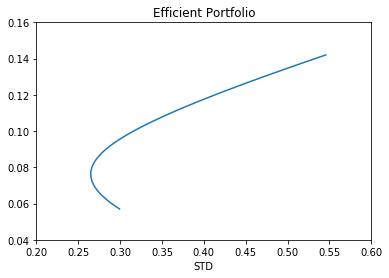

In [110]:
port.plot(x="STD",y="Expectation",title="Efficient Portfolio",
          xticks=[0.2,0.25,0.30,0.35,0.40,0.45,0.50,0.55,0.6],
          yticks=[0.04,0.06,0.08,0.1,0.12,0.14,0.16],
         legend=False)

### 2.市場ポートフォリオを見つける
無リスク資産金利$r_f$が存在するとき、$(0,r_f)$を通り効率的フロンティアに接する直線を市場資本戦(CML)、接点を市場ポートフォリオMと呼ぶ。

In [117]:
from scipy import optimize